In [140]:
import pandas as pd
import numpy as np
import os.path
import km3pipe.style.moritz

Loading style definitions from '/home/moritz/pkg/km3pipe/km3pipe/kp-data/stylelib/moritz.mplstyle'


`z: nu mass / wimp mass`

`theta: angle towards center of sun`

`z=E_nu/m_WIMP`

2d layout: `d^2N/dz dtheta`

1d: `dN/dz`

Neutrinos at detector (icecube), the units are `cm^-2 annihilation^-1`.

All energies in GeV

In [2]:
# Sun fast analysis:
#   Sun, 1d, diff, neutrino @ detector
infile_1d = './data/we-m10000-ch11-su-1D-diff-f1.dat'
infile_2d = './data/we-m10000-ch11-su-2D-diff-f1.dat'

In [3]:
FLAVORS = ['nu_e', 'anu_e', 'nu_mu', 'anu_mu', 'nu_tau', 'anu_tau']
CHANNELS = {
    1: 'd d-bar',
    2: 'u u-bar',
    3: 's s-bar',
    4: 'c c-bar',
    5: 'b b-bar',
    6: 't t-bar',
    7: 'g g',
    8: 'W+ W-',
    9: 'Z0 Z0',
    10: 'mu- mu+',
    11: 'tau- tau+',
    12: 'nu_e anu_e',
    13: 'nu_mu anu_mu',
    14: 'nu_tau anu_tau',
}
INTERESTING_CHANNELS = {8, 11, 5}
INTERESTING_CHANNELS.update({CHANNELS[c] for c in INTERESTING_CHANNELS})

In [4]:
n_lines_2d_per_flavor = 50
n_z_bins_1d = 100
z_bins_1d = np.linspace(0.005, 0.995, n_z_bins_1d)
n_z_bins_2d = n_lines_2d_per_flavor
z_bins_2d = np.linspace(0.01, 0.99, n_z_bins_2d)

n_theta_bins = 91
theta_first = np.linspace(0.1, 9.9, 50)
theta_second = np.linspace(10.25, 29.75, 40)
# last bin is >30
theta_last = [30., ]
theta_bins = np.concatenate([theta_first, theta_second, theta_last])
theta_bins

def parse_fname(fname):
    """Parse wimpsim filename.
    
    Returns
    -------
    parent_mass, channel, n_dimensions
    """
    # example: './data/we-m10000-ch11-su-1D-diff-f1.dat'
    _, mass, chan, _, dim, _, _ = os.path.basename(fname).split('-')
    # 'm10000'
    mass = float(mass[1:])
    # 'ch11'
    chan = int(chan[2:])
    # '1D' / '2D'
    ndim = int(dim[0])
    return mass, chan, ndim

def read_file(fname):
    mass, chan, ndim = parse_fname(fname)
    if ndim == 1:
        df = read_1d(fname)
    elif ndim == 2:
        df = read_2d(fname)
    else:
        raise ValueError(
            'Only 1d and 2d tables supported, got ndim={}'.format(ndim)
                        )
    df['mass'] = mass
    df['energy'] = df['mass'] * df['z']
    df['chan_num'] = chan
    #df['channel'] = CHANNELS[chan]
    return df

def read_2d(fname):
    raise NotImplementedError
    df = pd.read_csv(infile_2d, delim_whitespace=True, 
                     comment='#', header=None,
                    )
    df_fl = df[:n_lines_2d_per_flavor]
    #df['df_fl.index = z_bins_2d
    df_fl.index.rename('z_bin', inplace=True)
    df_fl.columns = theta_bins
    df_fl

def read_1d(fname):
    df = pd.read_csv(fname, delim_whitespace=True, 
                     comment='#', header=None,
                    )
    df = df.T
    df.columns = FLAVORS
    df['z'] = z_bins_1d
    return df

array([ 0.1 ,  0.3 ,  0.5 ,  0.7 ,  0.9 ,  1.1 ,  1.3 ,  1.5 ,  1.7 ,
        1.9 ,  2.1 ,  2.3 ,  2.5 ,  2.7 ,  2.9 ,  3.1 ,  3.3 ,  3.5 ,
        3.7 ,  3.9 ,  4.1 ,  4.3 ,  4.5 ,  4.7 ,  4.9 ,  5.1 ,  5.3 ,
        5.5 ,  5.7 ,  5.9 ,  6.1 ,  6.3 ,  6.5 ,  6.7 ,  6.9 ,  7.1 ,
        7.3 ,  7.5 ,  7.7 ,  7.9 ,  8.1 ,  8.3 ,  8.5 ,  8.7 ,  8.9 ,
        9.1 ,  9.3 ,  9.5 ,  9.7 ,  9.9 , 10.25, 10.75, 11.25, 11.75,
       12.25, 12.75, 13.25, 13.75, 14.25, 14.75, 15.25, 15.75, 16.25,
       16.75, 17.25, 17.75, 18.25, 18.75, 19.25, 19.75, 20.25, 20.75,
       21.25, 21.75, 22.25, 22.75, 23.25, 23.75, 24.25, 24.75, 25.25,
       25.75, 26.25, 26.75, 27.25, 27.75, 28.25, 28.75, 29.25, 29.75,
       30.  ])

In [5]:
read_file(infile_1d).head()

,nu_e,anu_e,nu_mu,anu_mu,nu_tau,anu_tau,z,mass,energy,chan_num
0,7.970510e-27,5.657570e-27,9.944470e-27,9.227040e-27,1.109740e-26,1.016980e-26,0.005,10000.0,50.0,11
1,2.108500e-27,2.194450e-27,2.592500e-27,3.142240e-27,2.784310e-27,3.589240e-27,0.015,10000.0,150.0,11
2,7.624060e-28,1.024850e-27,1.014020e-27,1.595840e-27,1.109800e-27,1.800760e-27,0.025,10000.0,250.0,11
3,3.248370e-28,5.289580e-28,4.348750e-28,8.775260e-28,4.728010e-28,9.775600e-28,0.035,10000.0,350.0,11
4,1.328610e-28,2.881800e-28,1.999270e-28,4.969510e-28,2.201530e-28,5.516180e-28,0.045,10000.0,450.0,11


In [6]:
from glob import glob
fnames = glob('./data/*.dat')

In [7]:
dfs = []
from km3pipe.io.pandas import df_to_h5
filt = tb.Filters(complevel=5, shuffle=True, fletcher32=True)
#with tb.File('wimpsim_1d.h5', 'w') as h5:
for fname in fnames:
    mass, chan, ndim = parse_fname(fname)
    if ndim == 2:
        continue
    if chan not in INTERESTING_CHANNELS:
        continue
    df = read_file(fname)
    chan_name = CHANNELS[chan]
    #tabname = '/{}/{}'.format(chan_name, str(mass))
    #df_to_h5(df, h5, where=tabname, 
    #         filters=filt, createparents=True)
    dfs.append(df)
dfs = pd.concat(dfs, axis=0)

In [9]:
with tb.File('../wimpsim_1d.h5', 'a') as h5:
    df_to_h5(dfs, h5, where='/flat', filters=filt, createparents=True)

In [118]:
dfs = dfs[(dfs.energy <= 100) & (dfs.energy > 1)]

mass = 1000.0
channel = 11
tab = dfs[
    (dfs.chan_num == channel) & 
    (np.isclose(dfs.mass, mass))
]

In [119]:
from km3pipe.math import loguniform

#ene = np.sort(loguniform().rvs(size=10))
flavor = 'nu_mu'
ene = np.geomspace(1, 100, 1000)

In [120]:
from scipy.interpolate import splrep, splev

In [121]:
spl = splrep(tab.energy, tab[flavor])

In [122]:
wimp_dndz = splev(ene, spl)

In [123]:
from km3flux.flux import Honda2015

In [124]:
honda = Honda2015()

In [170]:
Honda2015?

In [168]:
def dnde2flux(dnde, mass):
    """Expects Neutrinos at detector, 
    
    Input units are `cm^-2 annihilation^-1`.
    
    Output is / (m^2 sec sr GeV)
    """
    # dN/dz comes out of WS
    # y = dN/dz = MDM * (dN/dE)
    # gamm = (1e14/sec) * (100GeV/m_dm)^2 * (4*pi*r_suntoearth)     -> [GeV m^2 sr s/yr]
    # geom fact in wimpsim = 1/(4pi * r_sun_to_earth)
    # -> geom fact already included (if using "yields at detector" table)
    # -> gamma = 1e14 * (100/m)^2
    # i don't get the 1e9 ???
    # bah whatever
    flux = (dnde / mass) * 1e14 * 1e9 * np.square(100/mass)
    flux *= 1e4     # cm2 -> m2
    #gseagen:
    #pointsource, so the I_0 = 1 (no 1/sr)
    return flux

wsfl = dnde2flux(splev(ene, spl), mass)
hfl = honda(energy=ene)

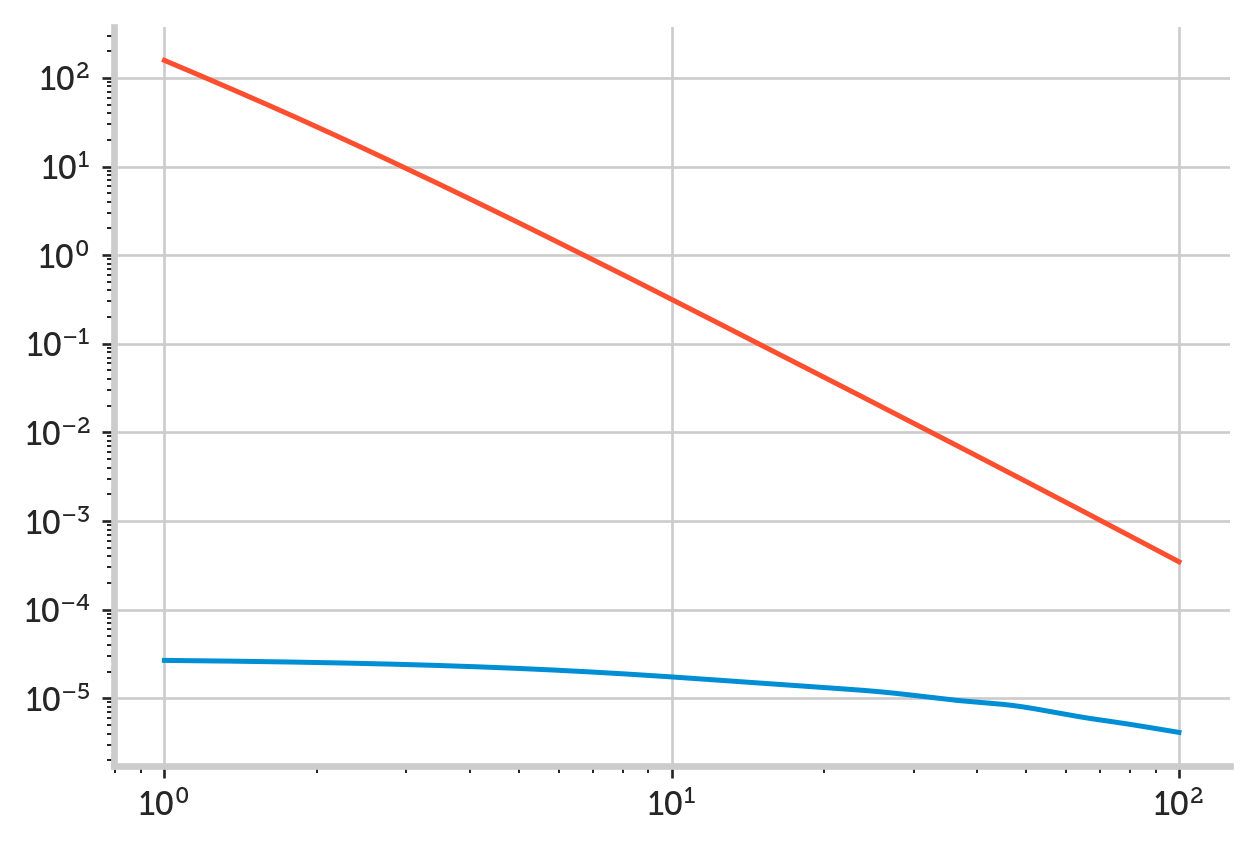

In [167]:
plt.loglog(ene, wsfl)
plt.loglog(ene, hfl)

In [169]:
assert False

from scipy.integrate import romberg, quad

hon_fun = honda
emin = 1
emax = 100

def ws_fun(ene):
    return splev(ene, spl)

hon_int = romberg(hon_fun, emin, emax)
ws_int = romberg(ws_fun, emin, emax)

plt.plot(ene, ws_fun(ene)/ws_int, 
         label='{m} GeV {c}'.format(c=CHANNELS[channel], m=mass))
plt.plot(ene, hon_fun(ene)/hon_int, label='Honda 2015 Atm.')
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$\nu_\mu$ Energy / GeV')
plt.ylabel(r'$\nu_\mu$ Flux (normalized)')
plt.legend(loc=0)
plt.savefig('spectra_norm.svg');

AssertionError: 